##Renegotiation paper visualization
**3D visualization of consumer optimum**
This code will draw 3 countour surfaces representing the consumer's indifference surfaces.
The plot will be in a separate Mayavi visualizer window that can then be rotated and modified,
for example to add a cut plane.

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Mon Jun 29 2015 16:46:16 


In [3]:
from __future__ import print_function
%matplotlib inline
import numpy as np
#import mayavi
import mayavi.mlab as mlab
from numpy import ogrid
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams["figure.figsize"] = (10, 8)

In [4]:
import Contract

In [5]:
cM = Contract.Monopoly(beta = 0.75)
cM.y = [30, 60, 60]
cM.print_params()

beta    : 0.75
delta   : 1.0
guess   : [100 100 100]
kappa   : 0
r       : 0.0
rho     : 0.95
y       : [30, 60, 60]


In [6]:
yE=cM.y
cMF = cM.fcommit()         # the full commitment contract 
cMR = cM.reneg(cMF)        # what renegotiate to if full commitment unantipatedly undone     
print("yE: ",yE)
print("cMF:",cMF)
print("cMR:", cMR)

yE:  [30, 60, 60]
cMF: [ 54.65850338  40.377858    40.377858  ]
cMR: [ 54.65850338  45.94761399  33.94286558]


In [7]:
c0, c1, c2 = ogrid[1:120, 1:120, 1:120]
rho = cM.rho
beta = cM.beta
def u(c):
    return ((1/(1-rho))*c**(1-rho))

#x, y, z, value = np.random.random((4, 3))*40
#value = np.ones(3)*23.0
#x = np.array([20,20,20 ])
#value = np.array([ 31,  31,  31.24444501])

In [8]:
x = np.array([yE[0], cMF[0], cMR[0]])
y = np.array([yE[1],  cMF[1],  cMR[1]])
z = np.array([yE[2],  cMF[2],  cMR[2]] ) 

#np.array([ 17.0,  17.0,  17.0]))
x,y,z

(array([ 30.        ,  54.65850338,  54.65850338]),
 array([ 60.        ,  40.377858  ,  45.94761399]),
 array([ 60.        ,  40.377858  ,  33.94286558]))

In [9]:
PUy = u(yE[0]) + beta*(u(yE[1]) + u(yE[2]))
yE, PUy

([30, 60, 60], 60.522856464796604)

Find the present expected utility value of the reservatin iso-utility surface  

In [10]:
PUMF = u(cMF[0]) + beta*(u(cMF[1]) + u(cMF[2]))
PUMF

60.522856464796604

**Plot it in mayavi interactive ** -- this will open an external window.  
As long as that window is open we can't proceed to more code. So the window must be closed to do further code.
We'll take a snapshot for later inline display in this notebook

In [11]:
ctr = mlab.contour3d(u(c0) + beta*(u(c1) + u(c2)),
                            contours=[PUy],transparent=True)
mlab.outline()

mlab.points3d(x, y, z)

mlab.plot3d([yE[0], cMF[0]], [yE[1], cMF[1]], [yE[2], cMF[2]], tube_radius=.5)
arr = mlab.screenshot()    # this saves an image that can be displayed later in the notebook
mlab.show()

Load the saved image

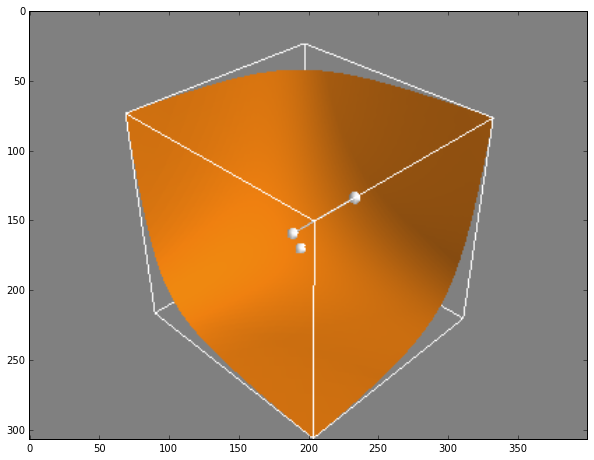

In [12]:
plt.imshow(arr)
plt.show()